In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.cure import cure
from pyclustering.utils import draw_clusters
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("ObesityDataSet.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

## Target column categorizaion

In [5]:
def classes(ob):
    if (ob == "Obesity_Type_I") or (ob == "Obesity_Type_II") or (ob == "Obesity_Type_III"):
        return 0
    elif (ob == "Overweight_Level_I") or (ob == "Overweight_Level_II"):
        return 1
    elif (ob == "Normal_Weight"):
        return 2
    else:
        return 3
    
df['NObeyesdad'] = df['NObeyesdad'].apply(classes)

In [6]:
df = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'NObeyesdad']]
df['Gender'] = df['Gender'].apply(lambda g: 0 if g == "Female" else 1)
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(lambda g: 0 if g == "no" else 1)

In [7]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,NObeyesdad
0,0,21.0,1.62,64.0,1,2
1,0,21.0,1.52,56.0,1,2
2,1,23.0,1.80,77.0,1,2
3,1,27.0,1.80,87.0,0,1
4,1,22.0,1.78,89.8,0,1


## Feature scaling

In [8]:
# Feature scaling

scale_cols = ['Age', 'Height', 'Weight']
sc = StandardScaler()
df[scale_cols] = sc.fit_transform(df[scale_cols])

## CURE Implementation

In [9]:
data = df.drop(['NObeyesdad'], axis = 1)
data = data.values.tolist()
cure_instance = cure(data, 4, compression = 0.3, number_represent_points = 1)
# cure_instance = cure(data, 4)
cure_instance.process()
clusters = cure_instance.get_clusters()

In [10]:
# Flatten the list and create a dictionary mapping indices to their respective sublist index
indices_map = {index: sublist_index for sublist_index, sublist in enumerate(clusters) for index in sublist}

# Create a new column based on the mapping
df['cluster'] = df.index.map(indices_map)

# Display the updated DataFrame
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,NObeyesdad,cluster
0,0,-0.522124,-0.875589,-0.862558,1,2,3
1,0,-0.522124,-1.947599,-1.168077,1,2,3
2,1,-0.206889,1.054029,-0.366090,1,2,0
3,1,0.423582,1.054029,0.015808,0,1,1
4,1,-0.364507,0.839627,0.122740,0,1,2


## Graphs plotting

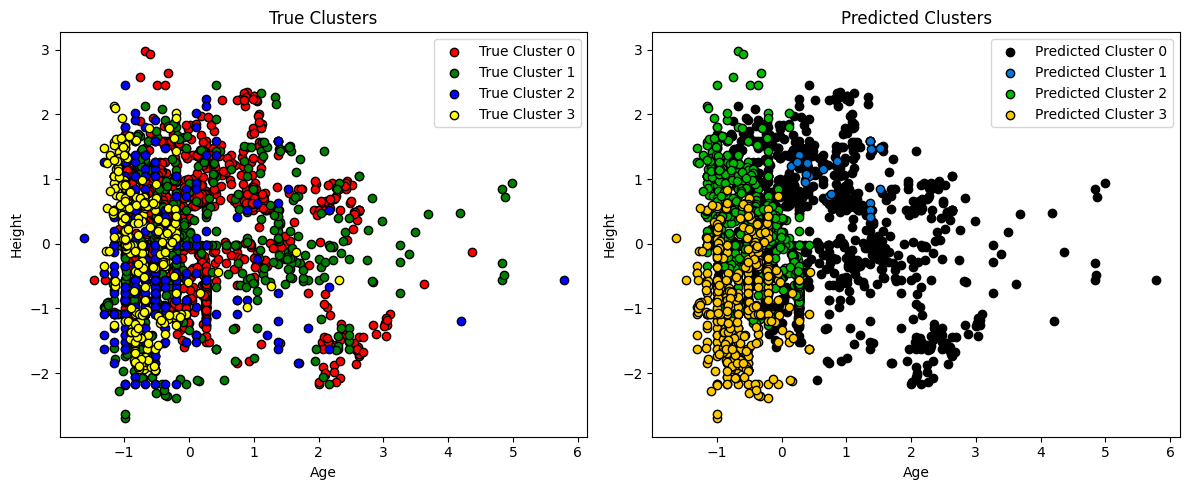

In [11]:
# Extracting features and labels
features = df[['Age', 'Height']]  # You can select any two features for visualization
true_clusters = df['NObeyesdad']
predicted_clusters = df['cluster']

# Assigning unique colors for true clusters
true_colors = ['red', 'green', 'blue', 'yellow']  # You can modify colors as needed

# Creating a color map for predicted clusters
label_encoder = LabelEncoder()
label_encoder.fit(predicted_clusters)
predicted_colors = [plt.cm.nipy_spectral(i / len(label_encoder.classes_)) for i in range(len(label_encoder.classes_))]

# Plotting true clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for cluster_id in range(len(label_encoder.classes_)):
    plt.scatter(features[true_clusters == cluster_id]['Age'], features[true_clusters == cluster_id]['Height'], color=true_colors[cluster_id], edgecolor='k', label=f'True Cluster {cluster_id}')
plt.title('True Clusters')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()

# Plotting predicted clusters
plt.subplot(1, 2, 2)
for cluster_id in range(len(label_encoder.classes_)):
    plt.scatter(features[predicted_clusters == cluster_id]['Age'], features[predicted_clusters == cluster_id]['Height'], color=predicted_colors[cluster_id], edgecolor='k', label=f'Predicted Cluster {cluster_id}')
plt.title('Predicted Clusters')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()

plt.tight_layout()
plt.savefig("cure_img.png")
plt.show()


## KMeans implementation

In [12]:
from sklearn.cluster import KMeans

data_sk = df.drop(['NObeyesdad'], axis = 1)
data_sk = data_sk.to_numpy()
kmeans = KMeans(n_clusters=4, n_init="auto").fit(data_sk)

In [13]:
preds = kmeans.predict(data_sk)

In [14]:
df['k_clusters'] = preds

In [15]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,NObeyesdad,cluster,k_clusters
0,0,-0.522124,-0.875589,-0.862558,1,2,3,0
1,0,-0.522124,-1.947599,-1.168077,1,2,3,0
2,1,-0.206889,1.054029,-0.366090,1,2,0,2
3,1,0.423582,1.054029,0.015808,0,1,1,2
4,1,-0.364507,0.839627,0.122740,0,1,2,0


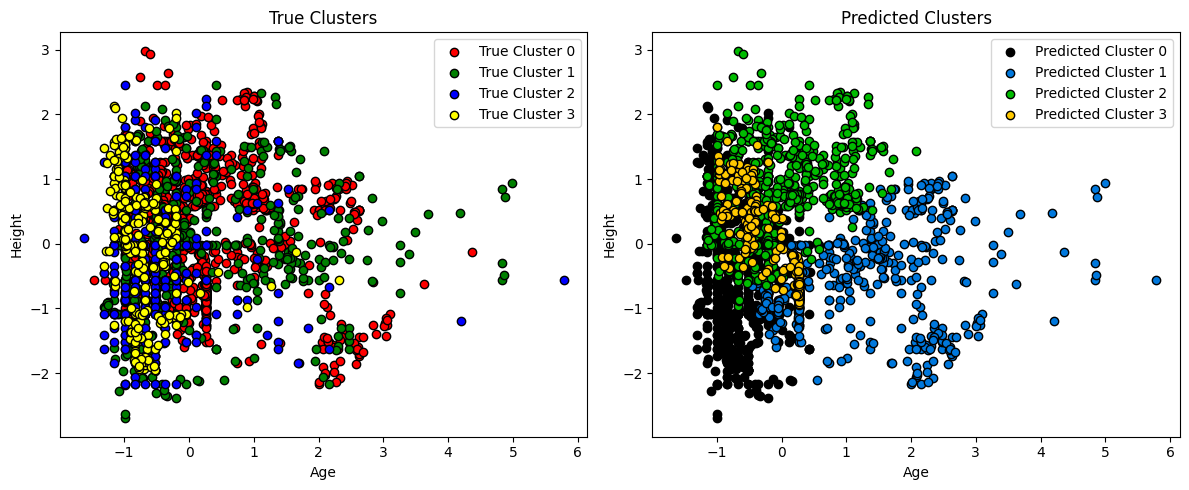

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# Extracting features and labels
features = df[['Age', 'Height']]  # You can select any two features for visualization
true_clusters = df['NObeyesdad']
predicted_clusters = df['k_clusters']

# Assigning unique colors for true clusters
true_colors = ['red', 'green', 'blue', 'yellow']  # You can modify colors as needed

# Creating a color map for predicted clusters
label_encoder = LabelEncoder()
label_encoder.fit(predicted_clusters)
predicted_colors = [plt.cm.nipy_spectral(i / len(label_encoder.classes_)) for i in range(len(label_encoder.classes_))]

# Plotting true clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for cluster_id in range(len(label_encoder.classes_)):
    plt.scatter(features[true_clusters == cluster_id]['Age'], features[true_clusters == cluster_id]['Height'], color=true_colors[cluster_id], edgecolor='k', label=f'True Cluster {cluster_id}')
plt.title('True Clusters')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()

# Plotting predicted clusters
plt.subplot(1, 2, 2)
for cluster_id in range(len(label_encoder.classes_)):
    plt.scatter(features[predicted_clusters == cluster_id]['Age'], features[predicted_clusters == cluster_id]['Height'], color=predicted_colors[cluster_id], edgecolor='k', label=f'Predicted Cluster {cluster_id}')
plt.title('Predicted Clusters')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()

plt.tight_layout()
plt.savefig("kmeans_img.png")
plt.show()


## Birch implementation

In [17]:
from sklearn.cluster import Birch

data_br = df.drop(['NObeyesdad'], axis = 1)
data_br = data_br.to_numpy()
birch = Birch(n_clusters=4).fit(data_br)

In [18]:
preds = birch.predict(data_br)

In [19]:
df['br_clusters'] = preds

In [20]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,NObeyesdad,cluster,k_clusters,br_clusters
0,0,-0.522124,-0.875589,-0.862558,1,2,3,0,3
1,0,-0.522124,-1.947599,-1.168077,1,2,3,0,3
2,1,-0.206889,1.054029,-0.366090,1,2,0,2,0
3,1,0.423582,1.054029,0.015808,0,1,1,2,0
4,1,-0.364507,0.839627,0.122740,0,1,2,0,3


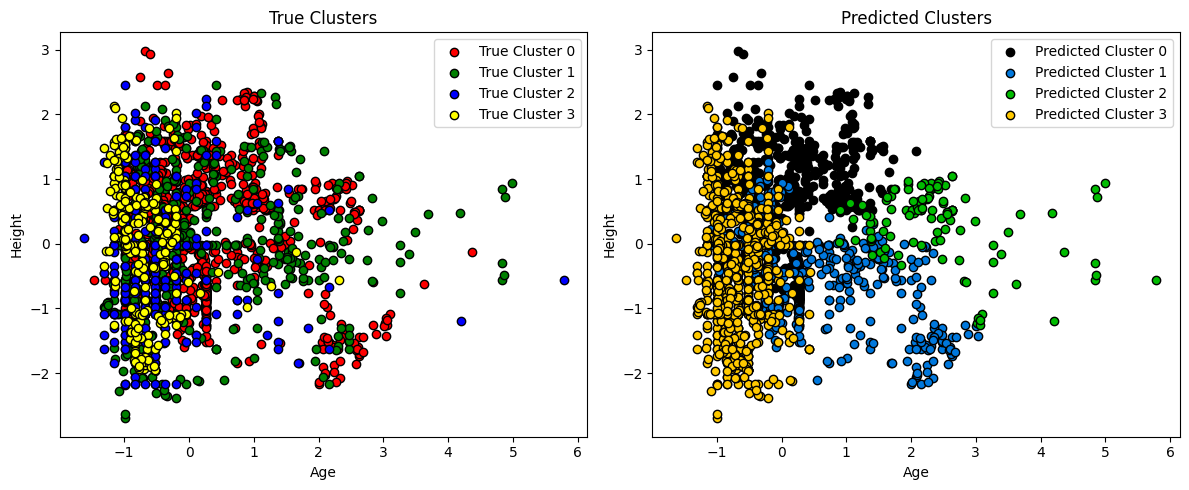

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Extracting features and labels
features = df[['Age', 'Height']]  # You can select any two features for visualization
true_clusters = df['NObeyesdad']
predicted_clusters = df['br_clusters']

# Assigning unique colors for true clusters
true_colors = ['red', 'green', 'blue', 'yellow']  # You can modify colors as needed

# Creating a color map for predicted clusters
label_encoder = LabelEncoder()
label_encoder.fit(predicted_clusters)
predicted_colors = [plt.cm.nipy_spectral(i / len(label_encoder.classes_)) for i in range(len(label_encoder.classes_))]

# Plotting true clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for cluster_id in range(len(label_encoder.classes_)):
    plt.scatter(features[true_clusters == cluster_id]['Age'], features[true_clusters == cluster_id]['Height'], color=true_colors[cluster_id], edgecolor='k', label=f'True Cluster {cluster_id}')
plt.title('True Clusters')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()

# Plotting predicted clusters
plt.subplot(1, 2, 2)
for cluster_id in range(len(label_encoder.classes_)):
    plt.scatter(features[predicted_clusters == cluster_id]['Age'], features[predicted_clusters == cluster_id]['Height'], color=predicted_colors[cluster_id], edgecolor='k', label=f'Predicted Cluster {cluster_id}')
plt.title('Predicted Clusters')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()

plt.tight_layout()
plt.savefig("birch_img.png")
plt.show()


## Comparison

In [22]:
from sklearn.metrics import silhouette_score

only = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'NObeyesdad']
df_only = df[only]

In [23]:
s_scores = []
s_scores.append(silhouette_score(df_only,df['cluster']))
s_scores.append(silhouette_score(df_only,df['k_clusters']))
s_scores.append(silhouette_score(df_only,df['br_clusters']))

print(silhouette_score(df_only,df['cluster']))
print(silhouette_score(df_only,df['k_clusters']))
print(silhouette_score(df_only,df['br_clusters']))


0.031915558863970586
0.23460360432910088
0.1893390123196946


In [24]:
from sklearn.metrics import rand_score

r_scores = []
r_scores.append(rand_score(df['NObeyesdad'],df['cluster']))
r_scores.append(rand_score(df['NObeyesdad'],df['k_clusters']))
r_scores.append(rand_score(df['NObeyesdad'],df['br_clusters']))

print(rand_score(df['NObeyesdad'],df['cluster']))
print(rand_score(df['NObeyesdad'],df['k_clusters']))
print(rand_score(df['NObeyesdad'],df['br_clusters']))

0.6288854813760465
0.6412284108742067
0.6678055143336304


In [25]:
from sklearn.metrics import adjusted_mutual_info_score

ami_scores = []
ami_scores.append(adjusted_mutual_info_score(df['NObeyesdad'],df['cluster']))
ami_scores.append(adjusted_mutual_info_score(df['NObeyesdad'],df['k_clusters']))
ami_scores.append(adjusted_mutual_info_score(df['NObeyesdad'],df['br_clusters']))

print(adjusted_mutual_info_score(df['NObeyesdad'],df['cluster']))
print(adjusted_mutual_info_score(df['NObeyesdad'],df['k_clusters']))
print(adjusted_mutual_info_score(df['NObeyesdad'],df['br_clusters']))

0.1752377240710184
0.3002416511706447
0.2904670595933726


In [26]:
ress = pd.DataFrame(data = zip(s_scores,r_scores,ami_scores), columns = ['Silhouette','Rand Index','Adjusted Mutual Info'], 
                    index = ['CURE','Kmeans','Birch'])
ress

,Silhouette,Rand Index,Adjusted Mutual Info
CURE,0.031916,0.628885,0.175238
Kmeans,0.234604,0.641228,0.300242
Birch,0.189339,0.667806,0.290467


In [27]:
# saving the evaluation results in a csv file

ress.to_csv("results.csv")